In [16]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [17]:
# 🔹 Upload dataset.txt
uploaded = files.upload()  # Make sure to upload 'dataset.txt'


Saving dataset.txt to dataset (1).txt


In [20]:
# 🔹 Load Data
# Use encoding='utf-8-sig' to handle the BOM character
data = np.loadtxt('dataset.txt', delimiter=',', encoding='utf-8-sig')
# data = np.loadtxt('dataset.txt', delimiter=',')
X = data[:, 0]  # Population
y = data[:, 1]  # Profit
m = len(y)  # Number of training examples

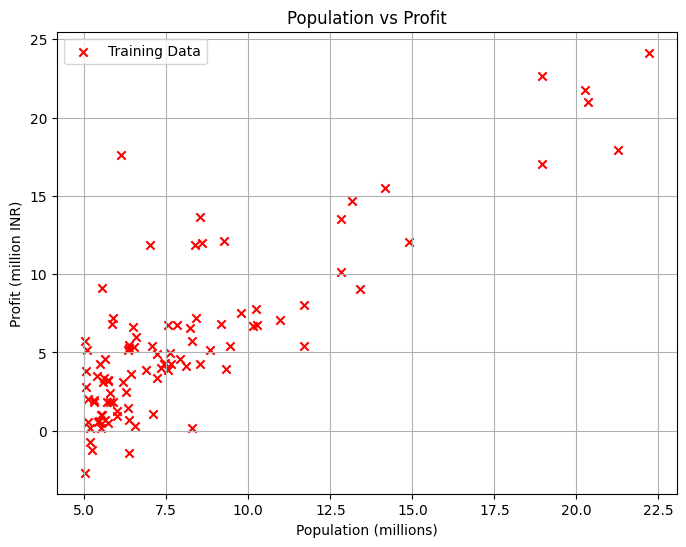

In [21]:
# 🔹 Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, marker='x', c='red', label='Training Data')
plt.xlabel('Population (millions)')
plt.ylabel('Profit (million INR)')
plt.title('Population vs Profit')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# 🔹 Add Bias Term to X (X0 = 1 for all)
X = np.c_[np.ones(m), X]

In [40]:
# 🔹 Initialize Parameters
theta = np.zeros(2)  # [theta0, theta1]
alpha = 0.01  # Learning rate
iterations = 5000  # Number of iterations

In [41]:
# 🔹 Cost Function (Half Mean Squared Error)
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

In [42]:
# 🔹 Gradient Descent Algorithm
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    J_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta -= (alpha / m) * (X.T.dot(errors))
        J_history.append(compute_cost(X, y, theta))

    return theta, J_history

In [43]:
# 🔹 Train Model
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)

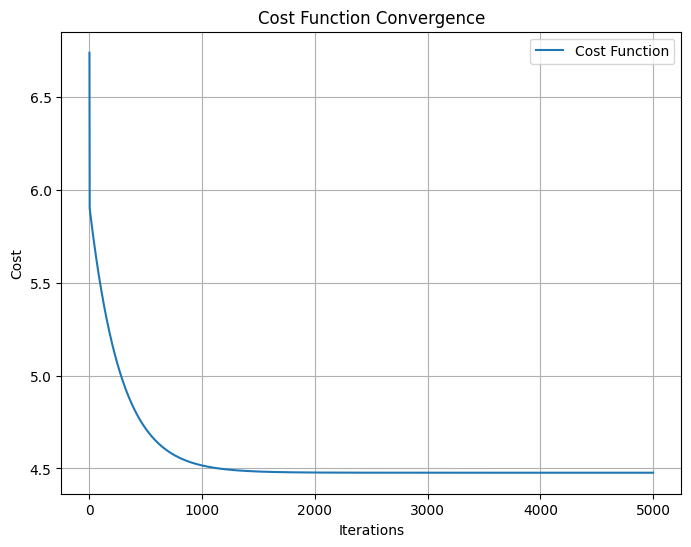

In [44]:

# 🔹 Plot Cost Function Convergence
plt.figure(figsize=(8, 6))
plt.plot(range(len(J_history)), J_history, label='Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Convergence')
plt.legend()
plt.grid(True)
plt.show()

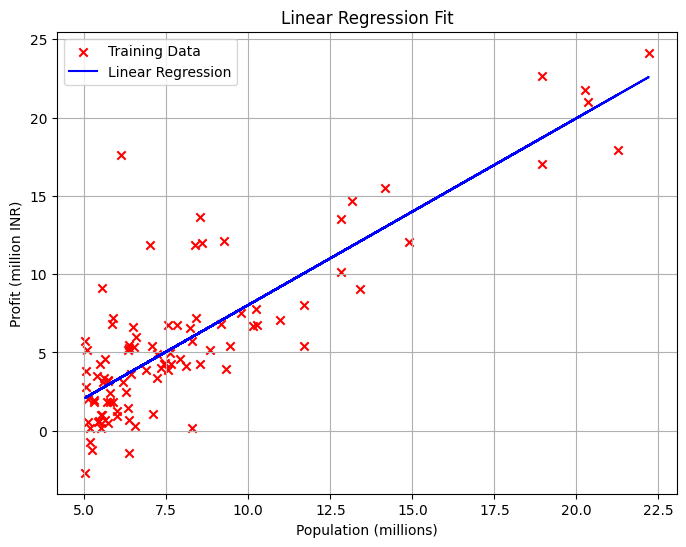

In [45]:
# 🔹 Plot Best Hypothesis Function
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, marker='x', c='red', label='Training Data')
plt.plot(X[:, 1], X.dot(theta), label='Linear Regression', color='blue')
plt.xlabel('Population (millions)')
plt.ylabel('Profit (million INR)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
# 🔹 Predict Profit for a New Population
def predict(population):
    return np.array([1, population]).dot(theta)

In [48]:
new_population = float(input("Enter population in millions: "))  # Example: 3.5 million
predicted_profit = predict(new_population)
print(f"Predicted Profit: {predicted_profit:.2f} million INR")

Enter population in millions: 6.1101
Predicted Profit: 3.39 million INR
